In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv("/Users/mohamedbasuony/Desktop/Research Data/metadata_mapped.csv")

In [4]:
df.shape

(219, 7)

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
214    False
215    False
216    False
217    False
218    False
Length: 219, dtype: bool

In [6]:
df.head(10)

,Participant_ID,AVECParticipant_ID,Gender,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity
0,302,training_001,male,0,4,0,28
1,303,training_002,female,0,0,0,17
2,304,training_003,female,0,6,0,20
3,305,training_004,male,0,7,0,28
4,307,training_005,female,0,4,0,23
5,308,training_006,female,1,22,1,67
6,309,training_007,male,1,15,1,74
7,310,training_008,male,0,4,0,35
8,311,training_009,female,1,21,1,70
9,312,training_010,male,0,2,0,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Participant_ID      219 non-null    int64 
 1   AVECParticipant_ID  219 non-null    object
 2   Gender              219 non-null    object
 3   PHQ_Binary          219 non-null    int64 
 4   PHQ_Score           219 non-null    int64 
 5   PCL-C (PTSD)        219 non-null    int64 
 6   PTSD Severity       219 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.1+ KB


In [8]:
df.drop(['Participant_ID', 'AVECParticipant_ID'], axis=1, inplace=True)

In [9]:
stats = df.describe()
df.describe()

,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity
count,219.000000,219.000000,219.000000,219.000000
mean,0.223744,6.639269,0.301370,35.333333
std,0.417707,6.000192,0.459904,16.571594
min,0.000000,0.000000,0.000000,17.000000
25%,0.000000,2.000000,0.000000,21.000000
50%,0.000000,5.000000,0.000000,29.000000
75%,0.000000,10.000000,1.000000,48.000000
max,1.000000,23.000000,1.000000,85.000000


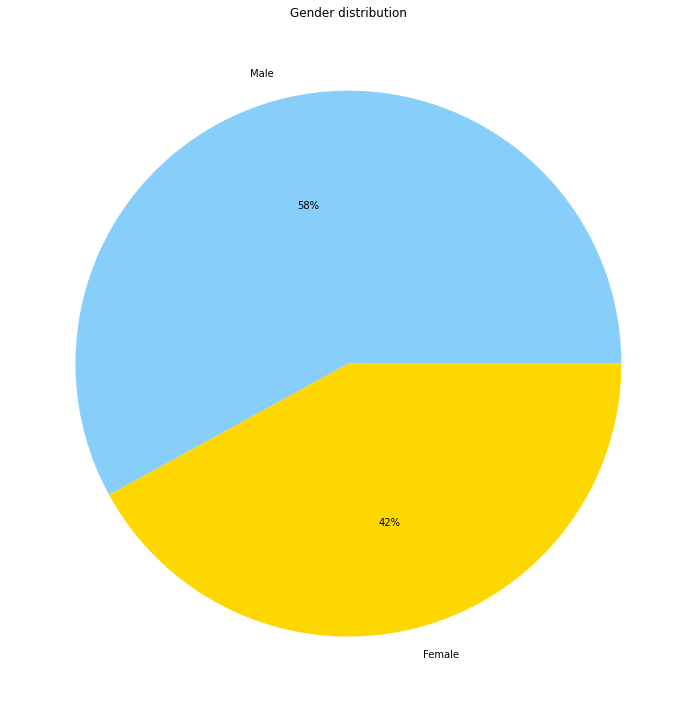

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 1) 
fig.set_size_inches(15, 10)
color=['lightskyblue', 'gold']

attrition_count = df['Gender'].value_counts().to_numpy()
plt.pie(attrition_count, labels = ['Male', 'Female'], colors = color, autopct='%.0f%%')
plt.title('Gender distribution')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='PTSD Severity'>

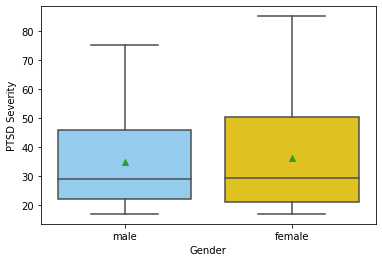

In [11]:
sn.boxplot(x='Gender', y='PTSD Severity', data=df, palette = color, showmeans=True)

<AxesSubplot:xlabel='Gender', ylabel='PHQ_Score'>

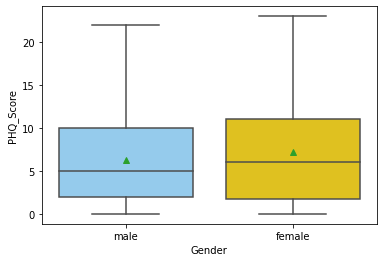

In [12]:
sn.boxplot(x='Gender', y='PHQ_Score', data=df, palette = color, showmeans=True)

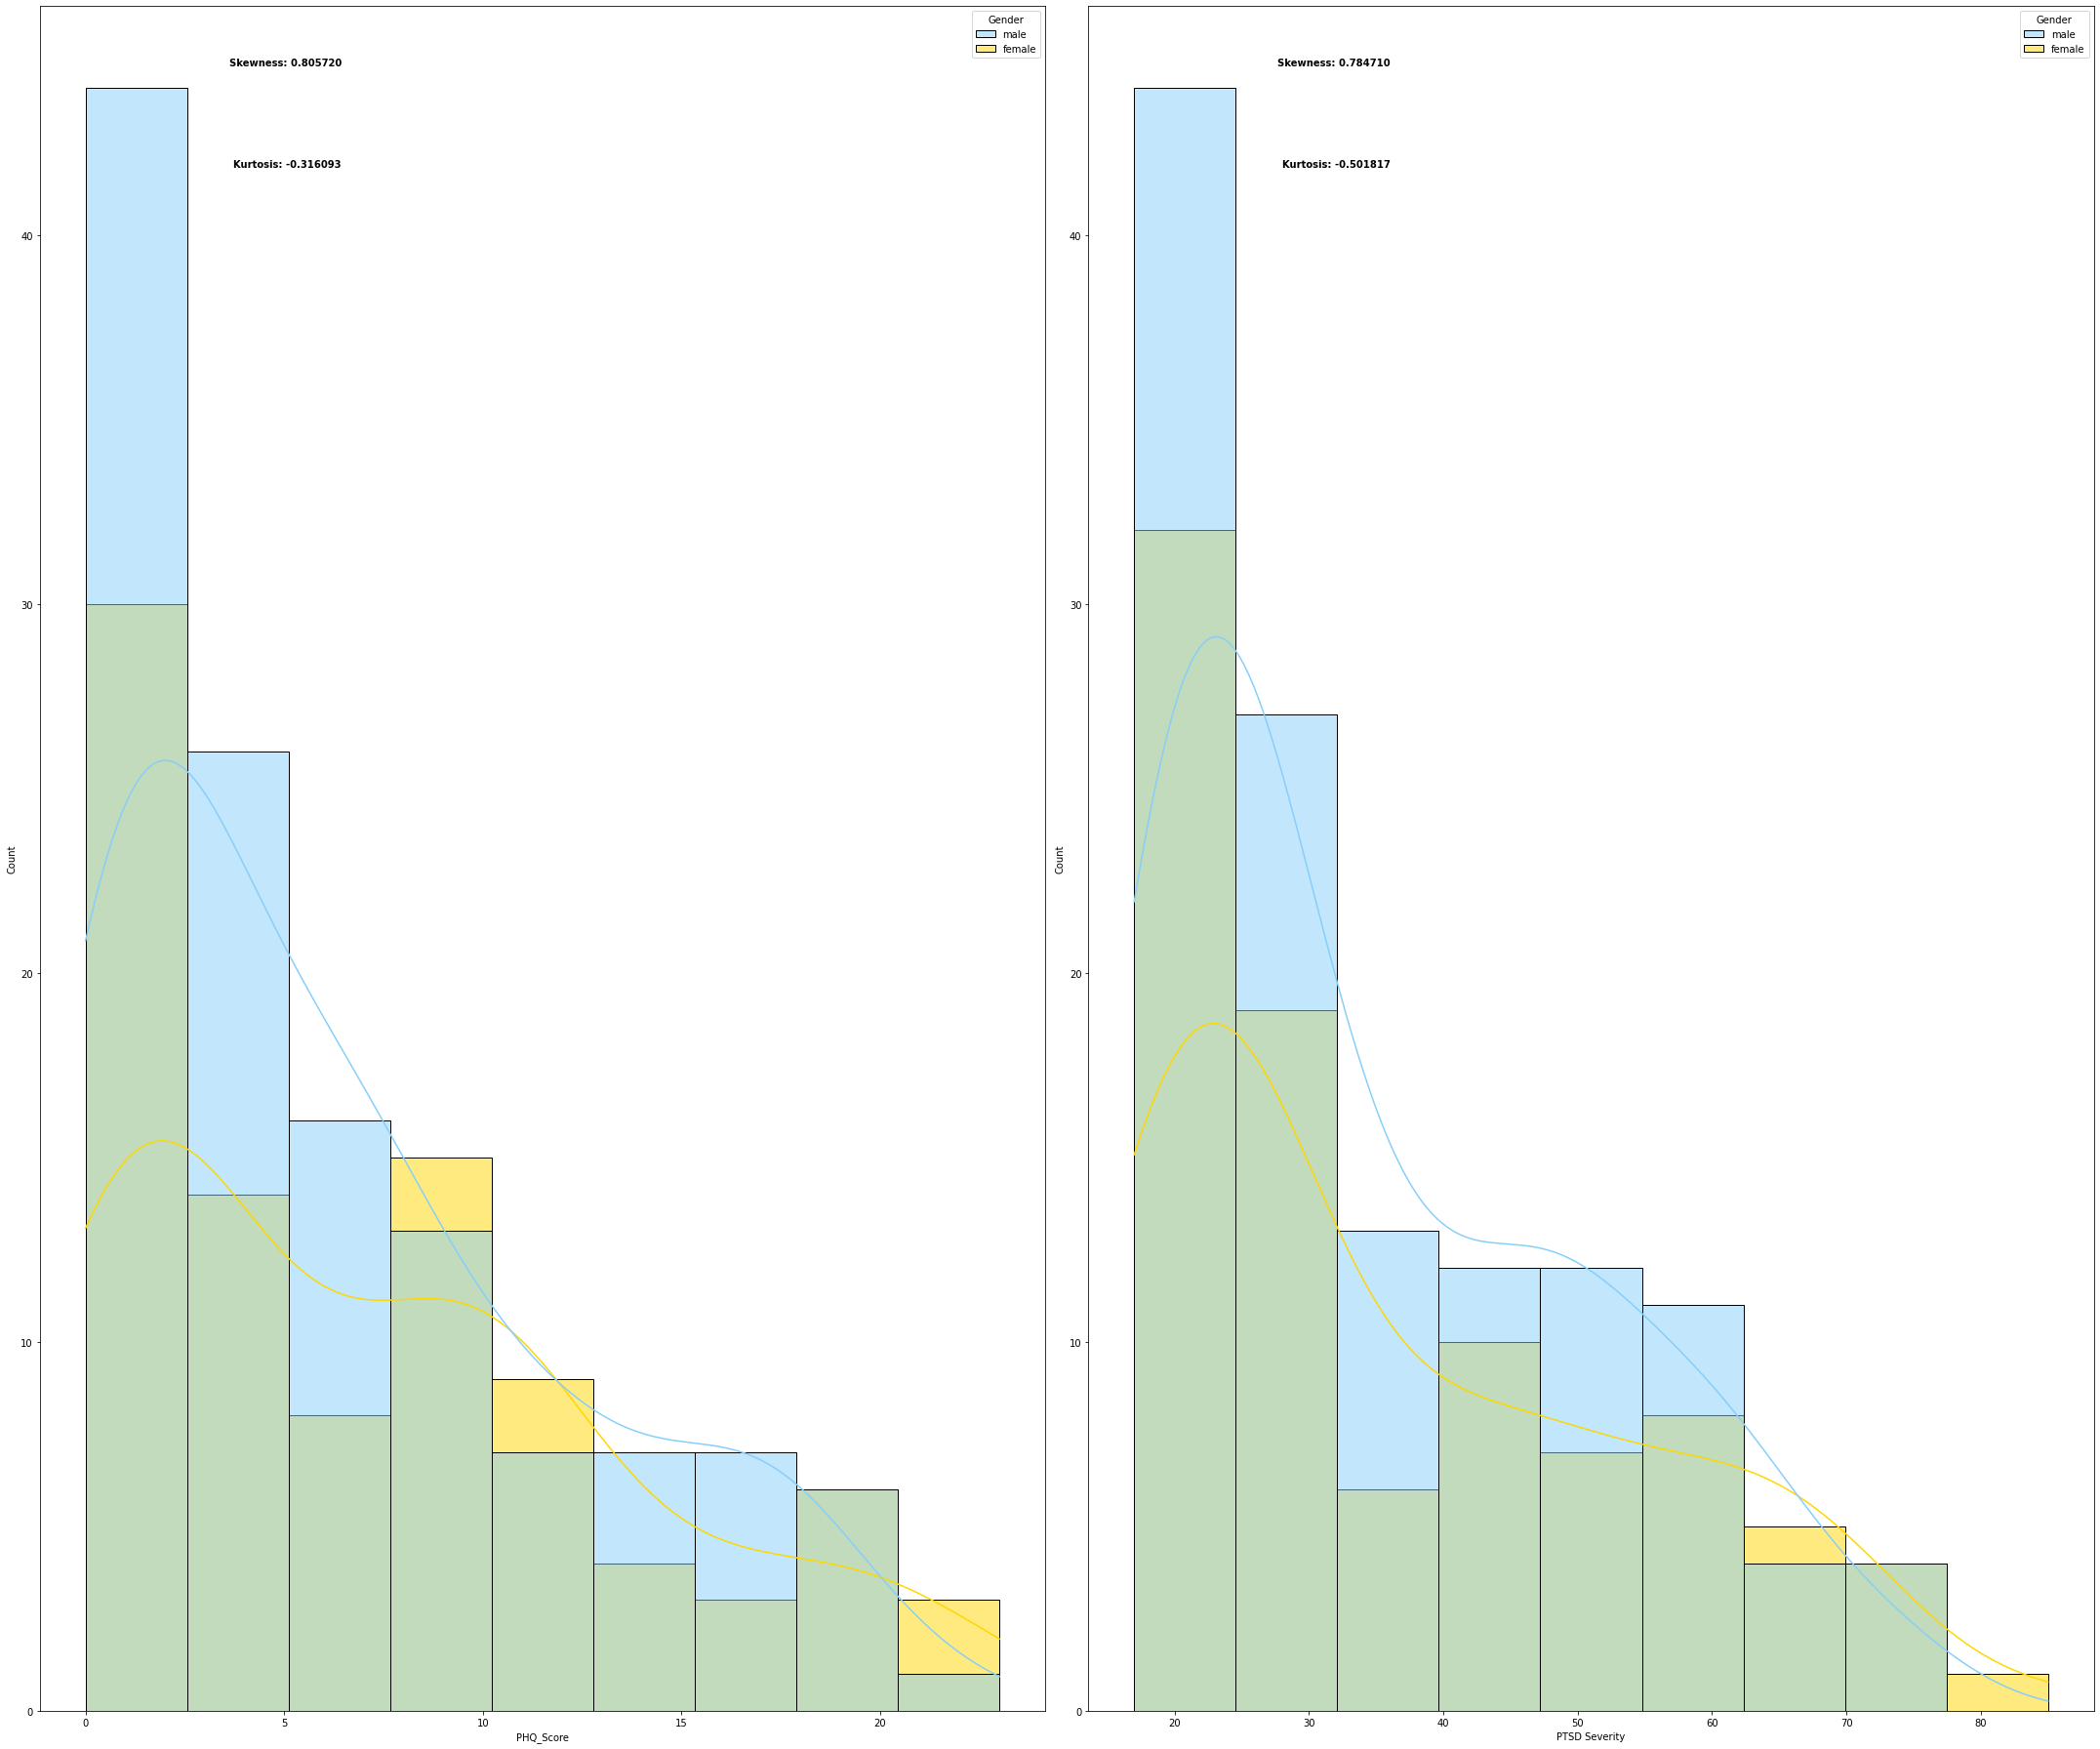

In [13]:
numerical_features=["PHQ_Score","PTSD Severity"]
fig, axes = plt.subplots(nrows = 1, ncols = 2) 
fig.set_size_inches(30, 25)
axes = axes.flatten()
skewed=[]
color=['lightskyblue','gold' ]

for ax, col in zip(axes, numerical_features):
    if df[col].skew()>2: skewed.append(col)
    ax.text(x=0.3, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df[col].skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')
    
    ax.text(x=0.3, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df[col].kurt(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')
    
    sn.histplot(x= col,hue='Gender', data=df, kde=True,  palette = color, ax = ax)

plt.tight_layout()
plt.show()